In [1]:
import numpy as np

path_to_samples = '../bayes_implicit_solvent/data/radii_samples_C.npy'

In [2]:
radius_samples = np.load(path_to_samples)
radius_samples.shape

(100001, 5)

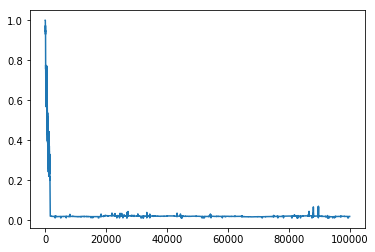

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(radius_samples[:,0])

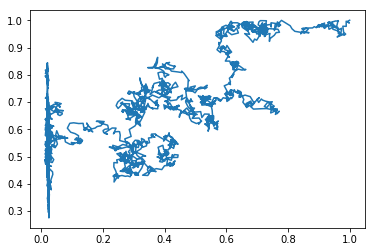

In [4]:
plt.plot(radius_samples[:,0], radius_samples[:,1])

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

In [6]:
burn_in = 10000

In [7]:
pca.fit(radius_samples[burn_in:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

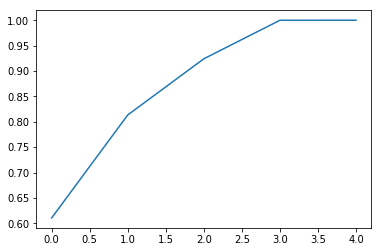

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.ylim(0,1)

In [9]:
y = pca.transform(radius_samples[burn_in:])

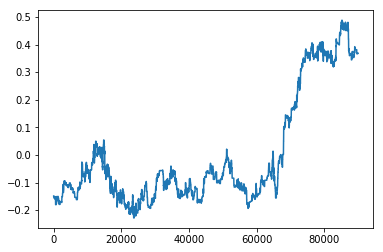

In [10]:
plt.plot(y[:,0])

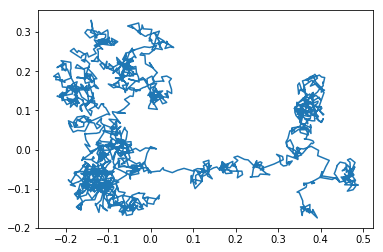

In [52]:
plt.plot(y[:,0], y[:,1])

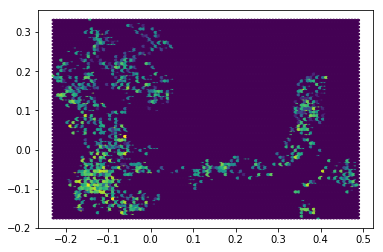

In [40]:
plt.hexbin(y[:,0], y[:,1], bins='log')

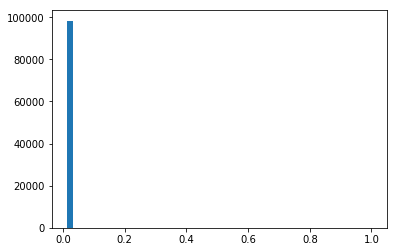

In [41]:
plt.hist(radius_samples[:,0], bins=50);

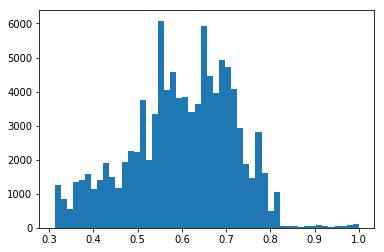

In [42]:
plt.hist(radius_samples[:,-1], bins=50);

In [43]:
atom_names = ['C1', 'H1', 'H2', 'H3', 'H4']

In [44]:
radius_samples[:,0].min(), radius_samples[:,0].max()

(0.01268190544290762, 1.0)

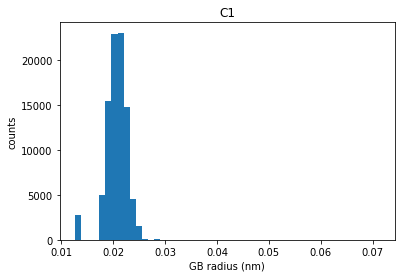

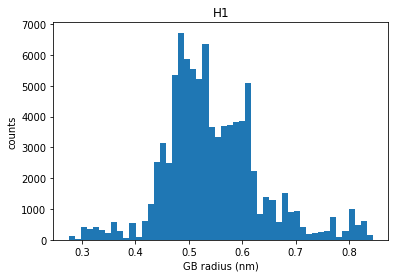

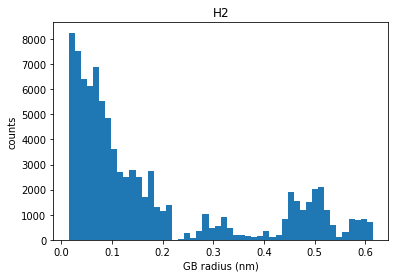

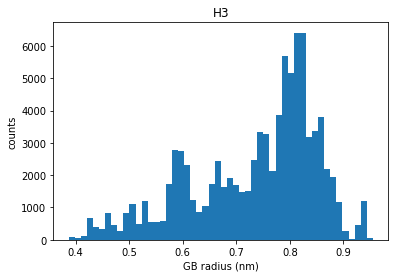

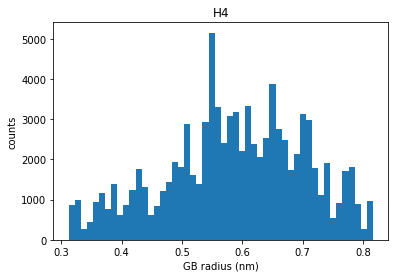

In [63]:
for i in range(radius_samples.shape[1]):
    plt.figure()
    plt.title(atom_names[i])
    plt.hist(radius_samples[burn_in:,i], bins=50);
    plt.xlabel('GB radius (nm)')
    plt.ylabel('counts')

In [64]:
# that's odd: I would expect H1-H4 to all have identical distributions of GB radii

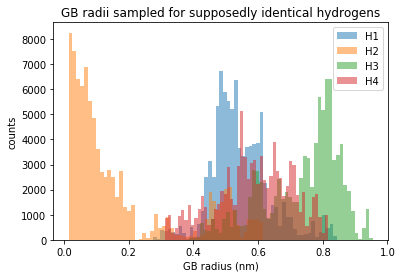

In [65]:
for i in range(radius_samples.shape[1])[1:]:
    plt.title('GB radii sampled for supposedly identical hydrogens')
    plt.hist(radius_samples[burn_in:,i], bins=50, alpha=0.5, label=atom_names[i]);
    plt.xlabel('GB radius (nm)')
    plt.ylabel('counts')
plt.legend()

Text(0, 0.5, 'radius of H3 (in nm)')

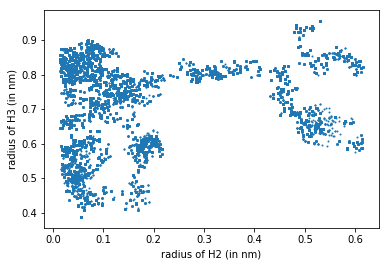

In [66]:
x = 2
y = 3

plt.scatter(radius_samples[burn_in:, x], radius_samples[burn_in:, y], s=1)
plt.xlabel('radius of {} (in nm)'.format(atom_names[x]))
plt.ylabel('radius of {} (in nm)'.format(atom_names[y]))

Text(0, 0.5, 'radius of H4 (in nm)')

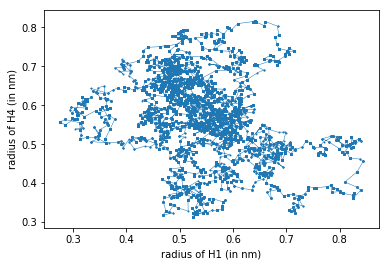

In [67]:
x = 1
y = 4

plt.plot(radius_samples[burn_in:, x], radius_samples[burn_in:, y], linewidth=0.5)
plt.scatter(radius_samples[burn_in:, x], radius_samples[burn_in:, y], s=1)
plt.xlabel('radius of {} (in nm)'.format(atom_names[x]))
plt.ylabel('radius of {} (in nm)'.format(atom_names[y]))

In [12]:
from bayes_implicit_solvent.solvation_free_energy import predict_solvation_free_energy

In [13]:
from bayes_implicit_solvent.posterior_sampling import Molecule
#mol = Molecule('C')

In [73]:
mol.predict_solvation_free_energy(radius_samples[-1])

(3.367875647947751, 0.001499320330015012)

In [74]:
mol.predict_solvation_free_energy(radius_samples[-1][np.array([0,4,3,2,1])])

(3.367527144868541, 0.0015867903819078554)

In [75]:
mol.predict_solvation_free_energy(radius_samples[-1][np.array([0,1,3,2,4])])

(3.367508927406479, 0.0015484163131197228)

In [76]:
# why are these very slightly different?

In [80]:
mean_preds = []
stddev_preds = []
for r in radius_samples[2*burn_in::100]:
    mean, stddev = mol.predict_solvation_free_energy(r)
    mean_preds.append(mean)
    stddev_preds.append(stddev)

Text(0.5, 0, '$\\Delta G_{solv}$ ($k_B T$)')

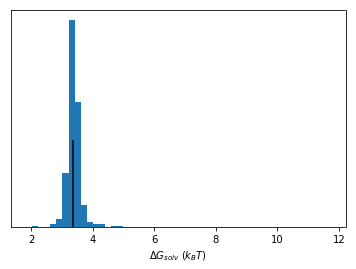

In [97]:
plt.hist(mean_preds, bins=50, density=True);

plt.vlines(mol.experimental_value, 0, 1.0)

plt.yticks([])

plt.xlabel(r'$\Delta G_{solv}$ ($k_B T$)')

In [101]:
np.mean(mean_preds), np.std(mean_preds) * 1.96

(3.4114115608966156, 0.8882621510424416)

In [87]:
np.mean(mean_preds)

3.4114115608966156

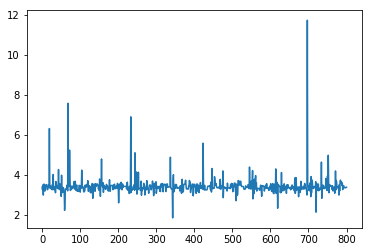

In [82]:
plt.plot(mean_preds)

In [83]:
np.max(stddev_preds)

0.022984133289434792

In [6]:
from bayes_implicit_solvent.solvation_free_energy import db

In [86]:
for i in range(len(db)):
    if db[i][1] == 'C':
        print(i)
        print(db[i])

593
['mobley_9055303', 'C', 'methane', '2.00', '0.20', '2.45', '0.01', '10.1039/P29900000291', '10.1021/jp0667442', 'Experimental uncertainty as suggested by 10.1039/P29900000291 -- 0.2 kcal/mol.  ']


In [89]:
from simtk import unit

2.0 * unit.kilocalorie_per_mole / (1.0 * unit.kilojoule_per_mole)

8.368

In [90]:
mol.experimental_value

3.375609170943315

In [91]:
mol.experimental_uncertainty

0.3375609170943315

In [93]:
db[mol.mol_index_in_freesolv]

['mobley_9055303',
 'C',
 'methane',
 '2.00',
 '0.20',
 '2.45',
 '0.01',
 '10.1039/P29900000291',
 '10.1021/jp0667442',
 'Experimental uncertainty as suggested by 10.1039/P29900000291 -- 0.2 kcal/mol.  ']

## Constrained to have only two types: H and not H

In [51]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_C.npy'

In [52]:
radius_samples_methane = np.load(path_to_samples)

In [53]:
burn_in = 10000

In [54]:
x = radius_samples_methane[burn_in:]

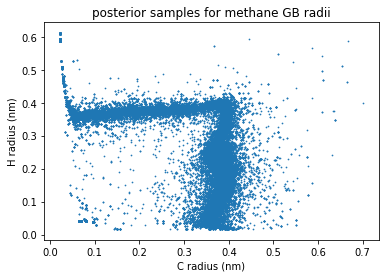

In [56]:
plt.scatter(x[:,0], x[:,1], s=0.5)
plt.xlabel('C radius (nm)')
plt.ylabel('H radius (nm)')

plt.title('posterior samples for methane GB radii')
plt.savefig('methane-posterior-samples.png', dpi=300)

In [13]:
from bayes_implicit_solvent.solvation_free_energy import smiles_list
alkanes = sorted([s for s in smiles_list if set(s) == set("C")])
alkanes

['C',
 'CC',
 'CCC',
 'CCCC',
 'CCCCC',
 'CCCCCC',
 'CCCCCCC',
 'CCCCCCCC',
 'CCCCCCCCC',
 'CCCCCCCCCC']

In [14]:
list(map(len, alkanes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0, 0.5, 'H radius (nm)')

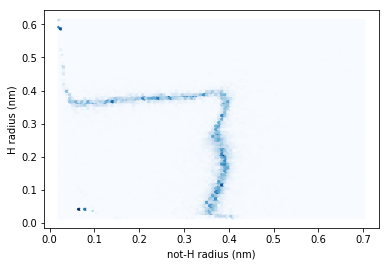

In [15]:
plt.hexbin(x[:,0], x[:,1], cmap='Blues')
plt.xlabel('not-H radius (nm)')
plt.ylabel('H radius (nm)')

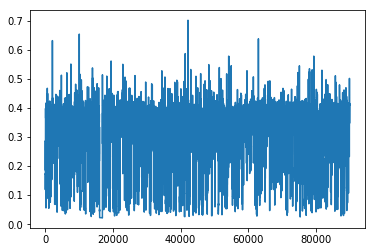

In [17]:
plt.plot(x[:,0])

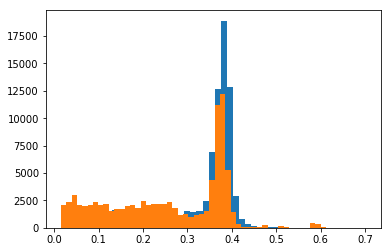

In [18]:
plt.hist(x[:,0], bins=50);
plt.hist(x[:,1], bins=50);

# Check generalization to other alkanes

In [47]:
from pkg_resources import resource_filename
import mdtraj as md
from bayes_implicit_solvent.utils import mdtraj_to_list_of_unitted_snapshots
alkanes = ['C' * i for i in range(1, 11)]

mols = []
hydrogens = []

n_configuration_samples = 100

for smiles in alkanes:
    mol = Molecule(smiles, vacuum_samples=[])
    path_to_vacuum_samples = resource_filename('bayes_implicit_solvent',
                                               'vacuum_samples/vacuum_samples_{}.h5'.format(
                                                   mol.mol_index_in_smiles_list))
    vacuum_traj = md.load(path_to_vacuum_samples)
    thinning = int(len(vacuum_traj) / n_configuration_samples)
    mol.vacuum_traj = mdtraj_to_list_of_unitted_snapshots(vacuum_traj[::thinning])
    print('thinned vacuum_traj from {} to {}'.format(len(vacuum_traj), len(mol.vacuum_traj)))
    hydrogens.append(np.array([a.element.symbol == 'H' for a in mol.top.atoms()]))
    mols.append(mol)

thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100
thinned vacuum_traj from 10000 to 100


In [48]:
def make_predictions_for_alkanes(radii):
    predictions = np.zeros((len(mols), 2))
    for i in range(len(mols)):
        mol = mols[i]
        atomic_radii = np.ones(len(mol.pos)) * radii[0]
        atomic_radii[hydrogens[i]] = radii[1]
        predictions[i] = mol.predict_solvation_free_energy(atomic_radii)
    return predictions

In [44]:
from tqdm import tqdm

In [45]:
alkane_predictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(radius_samples_methane[burn_in::100])])
alkane_predictions.shape

NameError: name 'radius_samples_methane' is not defined

In [37]:
means = alkane_predictions[:,:,0]

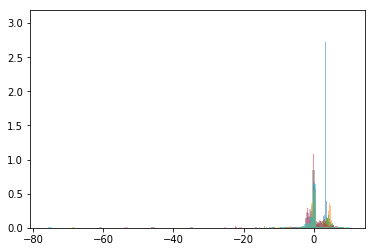

In [40]:
for i in range(len(mols)):
    plt.hist(means[:,i], alpha=0.5, density=True, bins=100);
    #plt.vlines(mols[i].experimental_value, 0, 2)

(-10, 10)

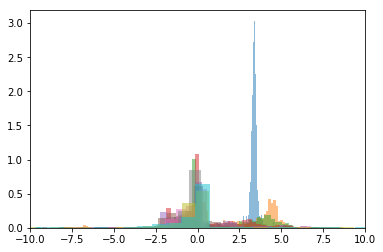

In [42]:
for i in range(len(mols)):
    plt.hist(means[:,i], alpha=0.5, density=True, bins=100);
    #plt.vlines(mols[i].experimental_value, 0, 2)
plt.xlim(-10,10)

Text(0, 0.5, 'experiment')

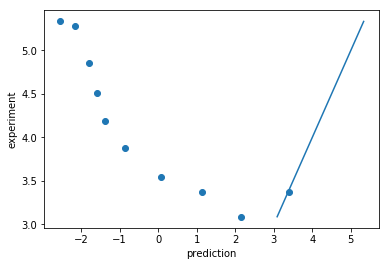

In [44]:
plt.scatter(means.mean(0), [mol.experimental_value for mol in mols])

x = sorted([mol.experimental_value for mol in mols])
plt.plot(x, x)

plt.xlabel('prediction')
plt.ylabel('experiment')

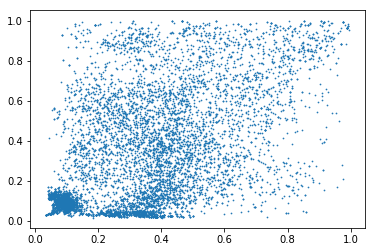

In [64]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_alkanes.npy'
radius_samples = np.load(path_to_samples)

burn_in = 1000
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)

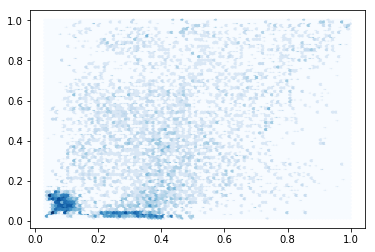

In [65]:
plt.hexbin(x[:,0], x[:,1], bins='log', cmap='Blues')

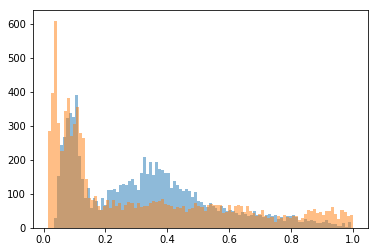

In [66]:
plt.hist(x[:,0], bins=100, alpha=0.5);
plt.hist(x[:,1], bins=100, alpha=0.5);

In [67]:
x[burn_in:,0].mean()

0.35055853627966604

In [68]:
x[burn_in:,1].mean()

0.33671999188149326

In [69]:
alkane_retrodictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in::10])])
alkane_retrodictions.shape

100%|██████████| 801/801 [03:06<00:00,  4.28it/s]


(801, 10, 2)

In [70]:
means = alkane_retrodictions[:,:,0]

In [71]:
stddevs = alkane_retrodictions[:,:,1]
np.max(stddevs)

0.4515697258004732

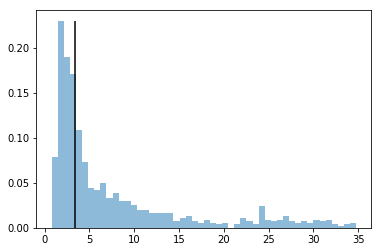

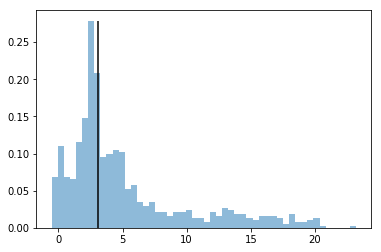

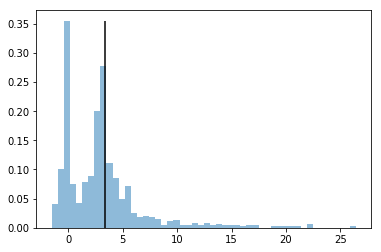

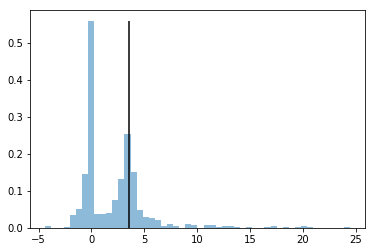

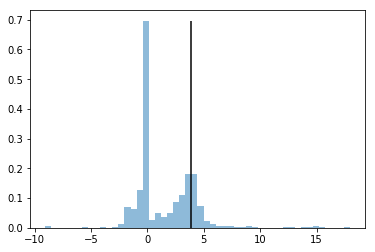

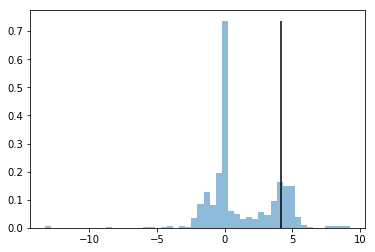

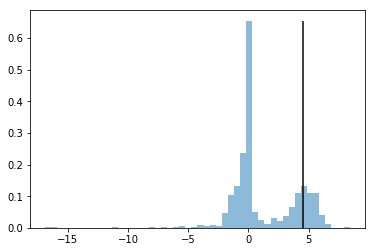

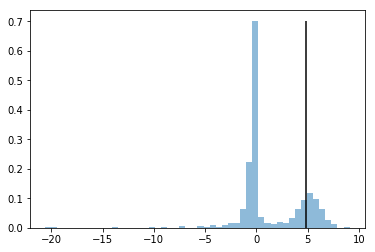

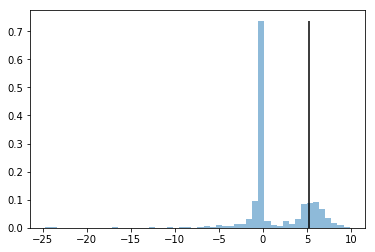

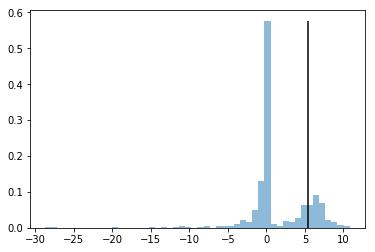

In [82]:
for i in range(len(mols)):
    plt.figure()
    heights = plt.hist(alkane_retrodictions[:,i,0], bins=50, density=True, alpha=0.5)[0];
    plt.vlines(mols[i].experimental_value, 0, np.max(heights))
    plt.yticks([])
    plt.ylabel('probability density')
    plt.xlabel()

Text(0, 0.5, 'experiment')

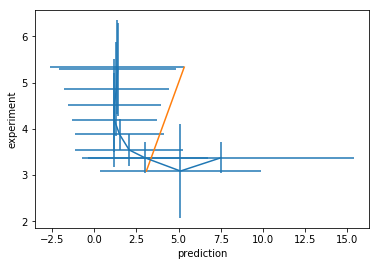

In [74]:
plt.errorbar(means.mean(0), [mol.experimental_value for mol in mols],
             yerr=[mol.experimental_uncertainty for mol in mols],
             xerr=means.std(0),
            )

x = sorted([mol.experimental_value for mol in mols])
plt.plot(x, x)

plt.xlabel('prediction')
plt.ylabel('experiment')

Text(0, 0.5, 'experimental solvation free energy')

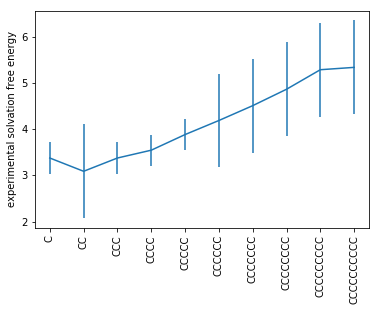

In [75]:
plt.errorbar(range(len(mols)), [mol.experimental_value for mol in mols], [mol.experimental_uncertainty for mol in mols])
plt.xticks(range(len(mols)), alkanes, rotation=90)
plt.ylabel('experimental solvation free energy')

Text(0, 0.5, 'solvation free energy')

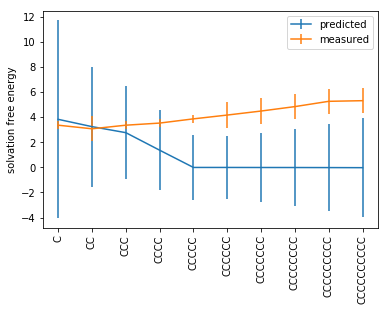

In [79]:
plt.errorbar(range(len(mols)), np.median(means, 0), means.std(0), label='predicted')
plt.errorbar(range(len(mols)), [mol.experimental_value for mol in mols], [mol.experimental_uncertainty for mol in mols], label='measured')

plt.xticks(range(len(mols)), alkanes, rotation=90)
plt.legend()
plt.ylabel('solvation free energy')

In [76]:
[mol.experimental_uncertainty for mol in mols]

[0.3375609170943315,
 1.0126827512829946,
 0.3375609170943315,
 0.3375609170943315,
 0.3375609170943315,
 1.0126827512829946,
 1.0126827512829946,
 1.0126827512829946,
 1.0126827512829946,
 1.0126827512829946]

In [25]:
alkanes

['C',
 'CC',
 'CCC',
 'CCCC',
 'CCCCC',
 'CCCCCC',
 'CCCCCCC',
 'CCCCCCCC',
 'CCCCCCCCC',
 'CCCCCCCCCC']

100%|██████████| 801/801 [02:57<00:00,  4.51it/s]


(801, 10, 2)

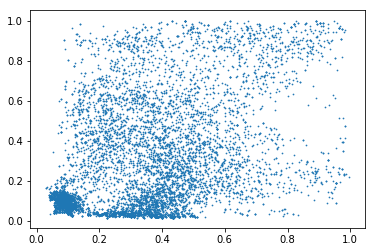

In [83]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_alkanes_n_config=50.npy'
radius_samples = np.load(path_to_samples)

burn_in = 1000
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)
alkane_retrodictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in::10])])
alkane_retrodictions.shape

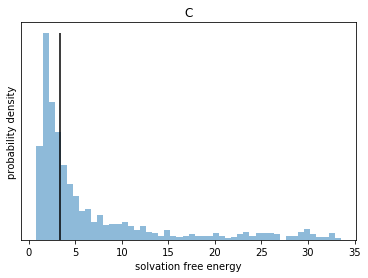

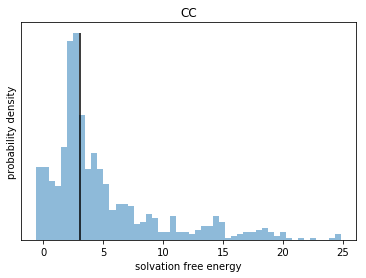

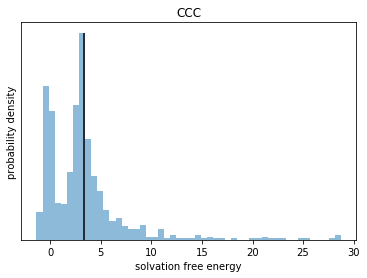

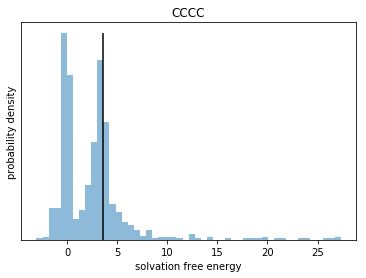

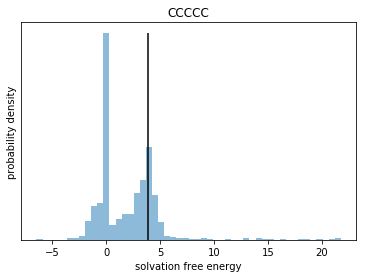

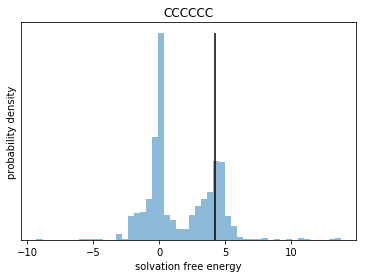

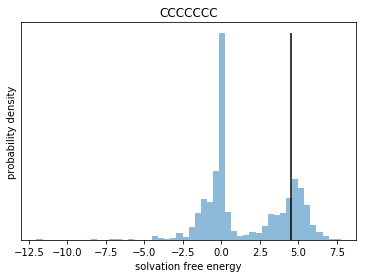

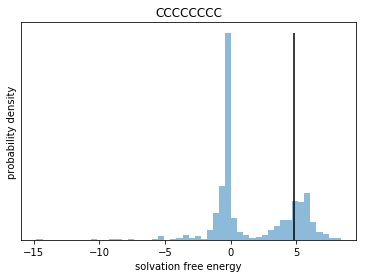

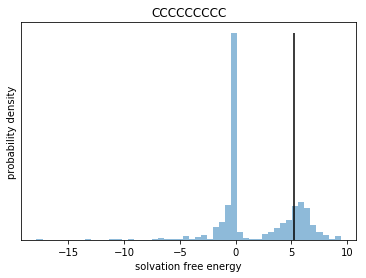

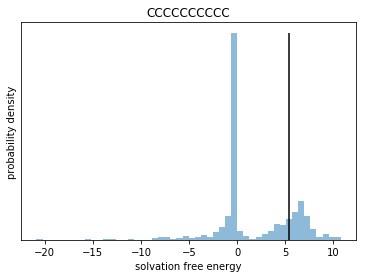

In [84]:
for i in range(len(mols)):
    plt.figure()
    plt.title(alkanes[i])
    heights = plt.hist(alkane_retrodictions[:,i,0], bins=50, density=True, alpha=0.5)[0];
    plt.vlines(mols[i].experimental_value, 0, np.max(heights))
    plt.yticks([])
    plt.ylabel('probability density')
    plt.xlabel('solvation free energy')

100%|██████████| 801/801 [02:55<00:00,  4.56it/s]


(801, 10, 2)

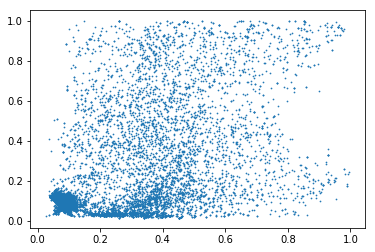

In [85]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_alkanes_n_config=100.npy'
radius_samples = np.load(path_to_samples)

burn_in = 1000
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)
alkane_retrodictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in::10])])
alkane_retrodictions.shape

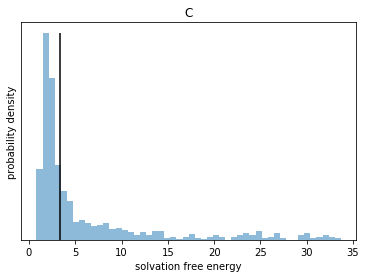

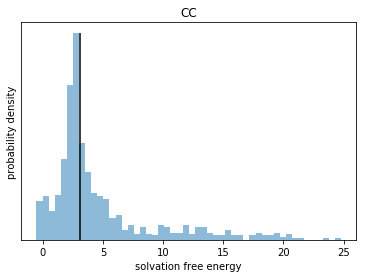

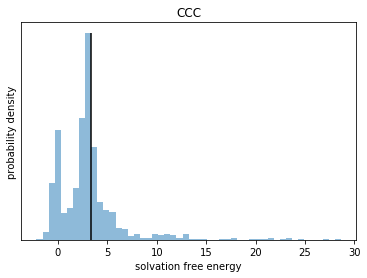

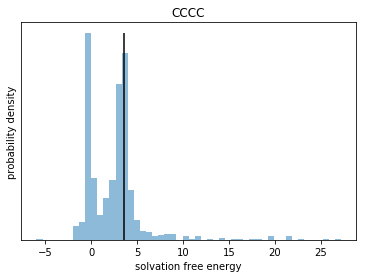

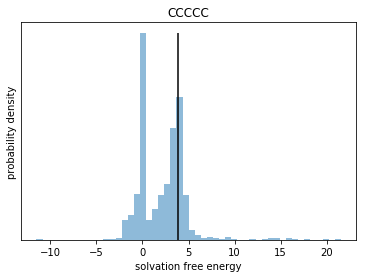

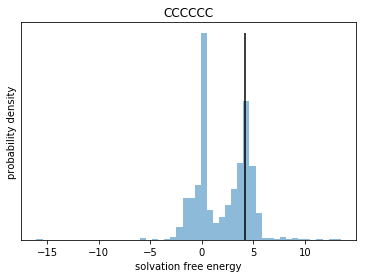

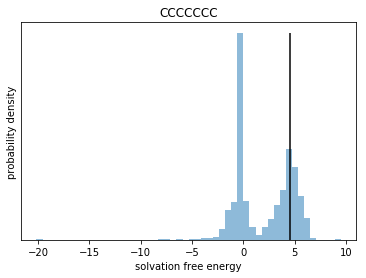

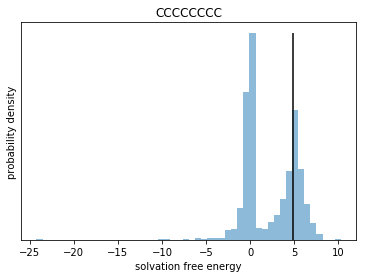

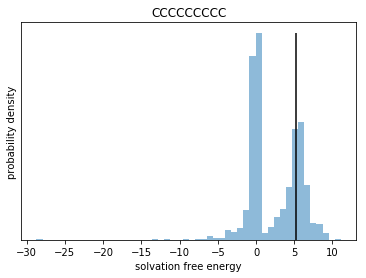

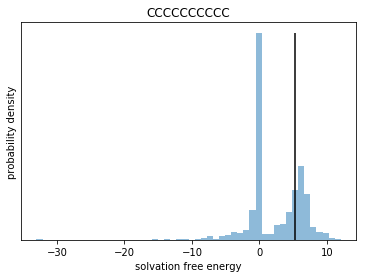

In [86]:
for i in range(len(mols)):
    plt.figure()
    plt.title(alkanes[i])
    heights = plt.hist(alkane_retrodictions[:,i,0], bins=50, density=True, alpha=0.5)[0];
    plt.vlines(mols[i].experimental_value, 0, np.max(heights))
    plt.yticks([])
    plt.ylabel('probability density')
    plt.xlabel('solvation free energy')

In [88]:
#hmm okay, let's color the scatter plot by predictions?

theta = x[burn_in::10]

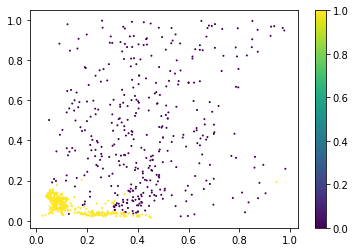

In [92]:
plt.scatter(theta[:,0], theta[:,1], s=1, c=alkane_retrodictions[:,-1,0]>0)
plt.colorbar()

In [99]:
inds = alkane_retrodictions[:,-1,0]>0

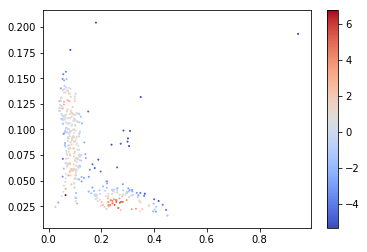

In [100]:
plt.scatter(theta[inds,0], theta[inds,1], s=1, c=alkane_retrodictions[inds,-1,0] - mols[-1].experimental_value, cmap='coolwarm')
plt.colorbar()

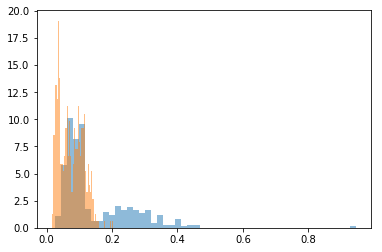

In [105]:
plt.hist(theta[inds,0], bins=50, density=True, alpha=0.5);

plt.hist(theta[inds,1], bins=50, density=True, alpha=0.5);

In [107]:
from bayes_implicit_solvent.solvation_free_energy import smiles_list

In [108]:
np.random.seed(0)

inds = np.arange(len(smiles_list))
np.random.shuffle(inds)
inds = inds[:int(len(smiles_list)/2)]

quarter_smiles = [smiles_list[i] for i in inds]

In [109]:
for alkane in alkanes:
    print(alkane, alkane in quarter_smiles)

C True
CC True
CCC False
CCCC False
CCCCC True
CCCCCC False
CCCCCCC True
CCCCCCCC True
CCCCCCCCC False
CCCCCCCCCC True


100%|██████████| 901/901 [03:20<00:00,  4.50it/s]


(901, 10, 2)

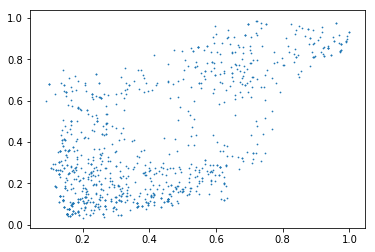

In [111]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_quarter_freesolv_n_config=10_mean.npy'
radius_samples = np.load(path_to_samples)

burn_in = 50
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)
alkane_predictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in:])])
alkane_predictions.shape

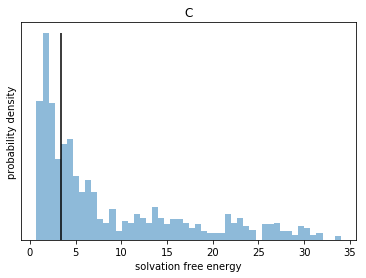

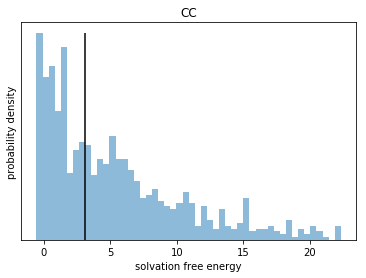

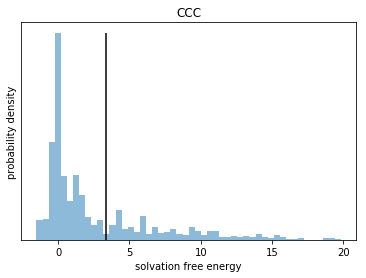

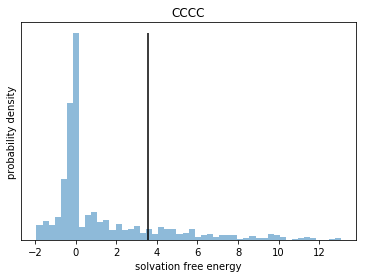

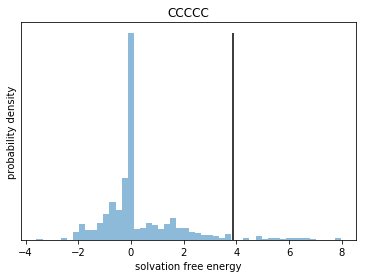

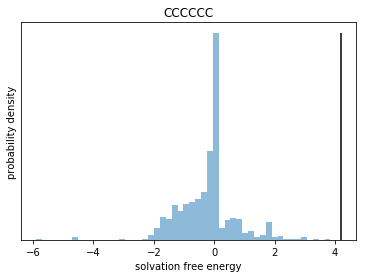

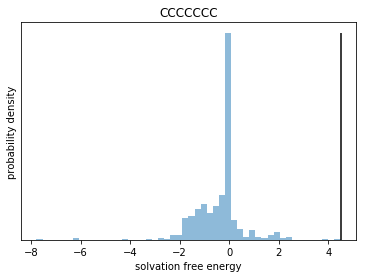

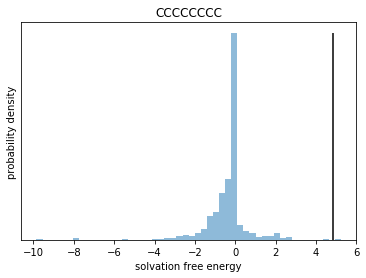

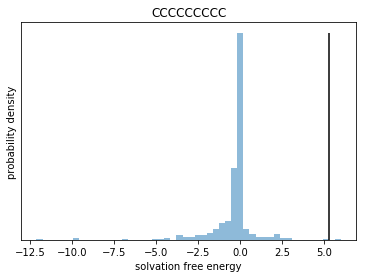

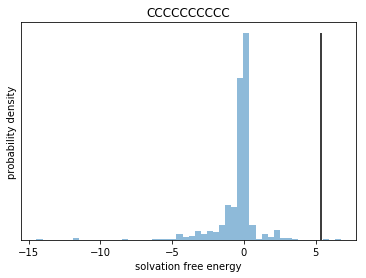

In [112]:
for i in range(len(mols)):
    plt.figure()
    plt.title(alkanes[i])
    heights = plt.hist(alkane_predictions[:,i,0], bins=50, density=True, alpha=0.5)[0];
    plt.vlines(mols[i].experimental_value, 0, np.max(heights))
    plt.yticks([])
    plt.ylabel('probability density')
    plt.xlabel('solvation free energy')

100%|██████████| 901/901 [03:59<00:00,  3.77it/s]


(901, 10, 2)

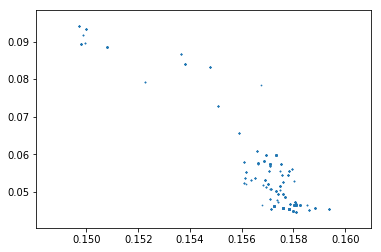

In [113]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_quarter_freesolv_n_config=10_sum.npy'
radius_samples = np.load(path_to_samples)

burn_in = 50
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)
alkane_predictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in:])])
alkane_predictions.shape

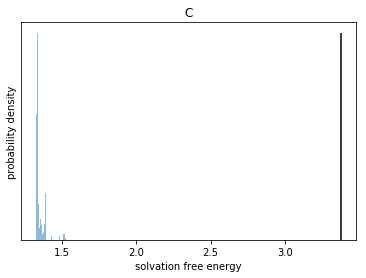

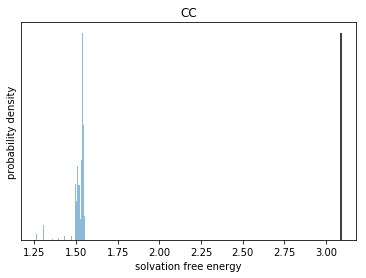

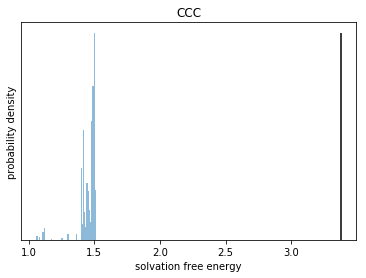

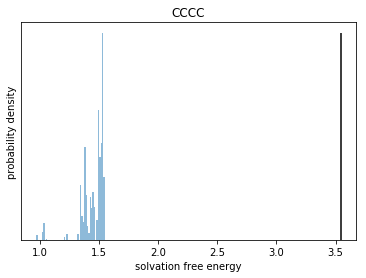

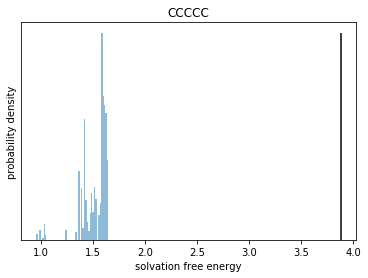

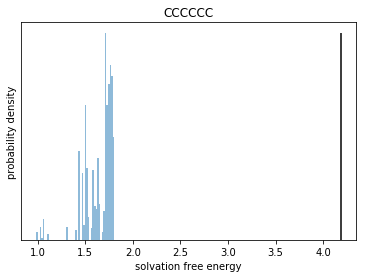

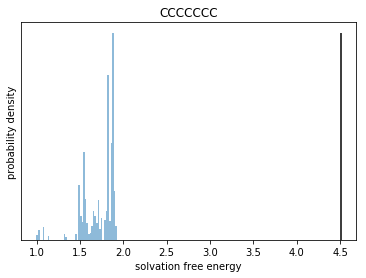

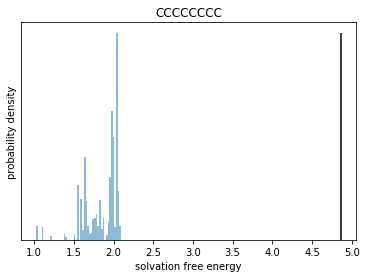

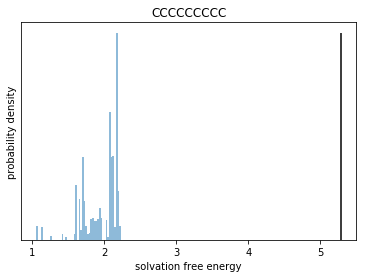

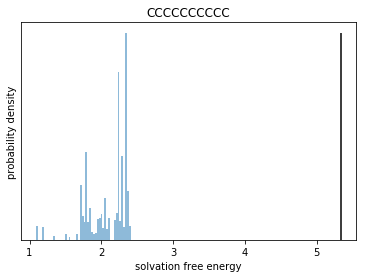

In [114]:
for i in range(len(mols)):
    plt.figure()
    plt.title(alkanes[i])
    heights = plt.hist(alkane_predictions[:,i,0], bins=50, density=True, alpha=0.5)[0];
    plt.vlines(mols[i].experimental_value, 0, np.max(heights))
    plt.yticks([])
    plt.ylabel('probability density')
    plt.xlabel('solvation free energy')

100%|██████████| 1001/1001 [03:43<00:00,  4.48it/s]


(1001, 10, 2)

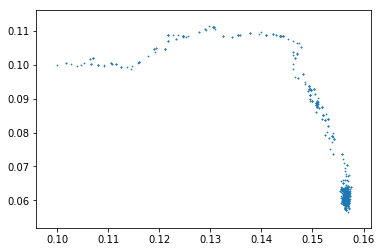

In [116]:
path_to_samples = '../bayes_implicit_solvent/data/H_vs_not_radii_samples_full_freesolv_n_config=10.npy'
radius_samples = np.load(path_to_samples)

burn_in = 0
x = radius_samples[burn_in:]
plt.scatter(x[:,0], x[:,1], s=0.5)
alkane_predictions = np.array([make_predictions_for_alkanes(r) for r in tqdm(x[burn_in:])])
alkane_predictions.shape

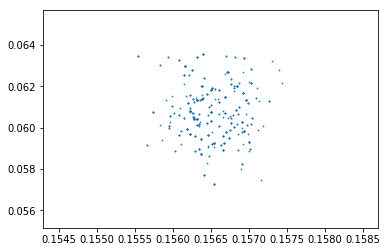

In [118]:
plt.scatter(x[500:,0], x[500:,1], s=0.5)

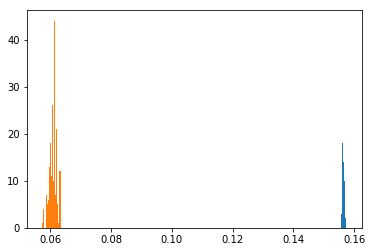

In [120]:
plt.hist(x[500:,0], bins=50);
plt.hist(x[500:,1], bins=50);